## Periodic kernel

Periodic kernel is defined as the exponential sine squared kernel:

$$
K(\mathbf{x}, \mathbf{y}) = \exp ( \frac{-2}{l^2} \sin^{2} ( \frac{\pi}{p} | \mathbf{x}- \mathbf{y} | ) )
$$

In [1]:
from sympy import *

In [2]:
l, p, x, y = symbols("l p x y")
K = exp(- (2 / l ** 2) * sin(pi / p * abs(x - y)) ** 2)
diff(K, p)

4*pi*exp(-2*sin(pi*Abs(x - y)/p)**2/l**2)*sin(pi*Abs(x - y)/p)*cos(pi*Abs(x - y)/p)*Abs(x - y)/(l**2*p**2)

In [3]:
diff(K, p)

4*pi*exp(-2*sin(pi*Abs(x - y)/p)**2/l**2)*sin(pi*Abs(x - y)/p)*cos(pi*Abs(x - y)/p)*Abs(x - y)/(l**2*p**2)

In [3]:
diff(K, l)

4*exp(-2*sin(pi*Abs(x - y)/p)**2/l**2)*sin(pi*Abs(x - y)/p)**2/l**3

In [25]:
from sympy.vector import CoordSys3D

N = CoordSys3D("N")

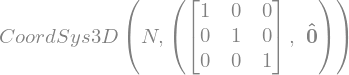

In [26]:
N

In [ ]:
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import ExpSineSquared

while True:
    xtr = np.random.rand(25,25)
    ytr = np.random.rand(25)
    model = gp.GaussianProcessRegressor(kernel=ExpSineSquared(),
                                                alpha=1e-5,
                                                n_restarts_optimizer=10,
                                                normalize_y=True)
    model.fit(xtr, ytr)

/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def f(x): return(np.array([np.sin(7 * x), x ** 4]))

kernel = RBF()
gp = GaussianProcessRegressor(kernel=RBF(length_scale=15.7), n_restarts_optimizer=50,
                         normalize_y=True) # (works when normalize_y is False)

X = np.linspace(0, 5, 5)
gp.fit(np.atleast_2d(X).T, f(X).T)

newx = np.atleast_2d([1, 2, 3, 4]).T
gp.predict(newx, return_std=False)
gp.predict(newx, return_std=True)

/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## Experiment

### Compute the kernel matrix

In [3]:
import sklearn

sklearn.__version__

'1.0.dev0'

In [4]:
import numpy as np

r = np.linspace(0, 1, num=4)
train_x, train_y = np.meshgrid(r, r)
X = np.stack((train_x.flatten(), train_y.flatten()), axis=-1)

In [5]:
X

array([[0.        , 0.        ],
       [0.33333333, 0.        ],
       [0.66666667, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.33333333],
       [0.33333333, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.33333333],
       [0.        , 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.66666667],
       [1.        , 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 1.        ],
       [0.66666667, 1.        ],
       [1.        , 1.        ]])

In [6]:
periodicity = 1.5
length_scale = 0.5

In [7]:
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel_sklearn = ExpSineSquared(
    periodicity=periodicity, length_scale=length_scale,
)
K_sklearn = kernel_sklearn(X)
K_sklearn[0]

array([1.00000000e+00, 3.66842677e-02, 4.26981239e-04, 2.47875218e-03,
       3.66842677e-02, 1.34573550e-03, 1.56634941e-05, 9.09312084e-05,
       4.26981239e-04, 1.56634941e-05, 1.82312978e-07, 1.05838067e-06,
       2.47875218e-03, 9.09312084e-05, 1.05838067e-06, 6.14421235e-06])

In [8]:
np.linalg.eigh(K_sklearn)[0]

array([0.88422032, 0.92031869, 0.92031869, 0.95789078, 0.95961332,
       0.95961332, 0.99716727, 0.99716727, 0.99878962, 0.99878962,
       1.03787671, 1.03787671, 1.0414347 , 1.08219069, 1.08219069,
       1.12454163])

In [9]:
from tensorflow_probability import math

kernel_tfp = math.psd_kernels.ExpSinSquared(
   period=periodicity, length_scale=length_scale
)
K_tfp = kernel_tfp.matrix(X, X)
K_tfp.numpy()[0]

array([1.0000000e+00, 3.6684260e-02, 4.2698105e-04, 2.4787546e-03,
       3.6684260e-02, 1.3457348e-03, 1.5663483e-05, 9.0931273e-05,
       4.2698105e-04, 1.5663483e-05, 1.8231282e-07, 1.0583813e-06,
       2.4787546e-03, 9.0931273e-05, 1.0583813e-06, 6.1442242e-06],
      dtype=float32)

In [10]:
np.linalg.eigh(K_tfp.numpy())[0]

array([0.8842203 , 0.92031866, 0.92031866, 0.95789075, 0.9596133 ,
       0.9596133 , 0.9971673 , 0.9971673 , 0.9987896 , 0.9987896 ,
       1.0378767 , 1.0378767 , 1.0414346 , 1.0821906 , 1.0821906 ,
       1.1245416 ], dtype=float32)

In [11]:
import torch
from gpytorch.kernels import PeriodicKernel

kernel_pytorch = PeriodicKernel()
K_pytorch = kernel_pytorch(torch.from_numpy(X))
K_pytorch.numpy()[0]

array([1.        , 0.05641548, 0.95948005, 0.06124461, 0.05641548,
       0.12793895, 0.85336358, 0.05651977, 0.95948005, 0.85336358,
       0.09408079, 0.20426127, 0.06124461, 0.05651977, 0.20426127,
       0.95508421])

In [12]:
np.linalg.eigh(K_pytorch.numpy())[0]

array([-1.27815495, -1.21435487, -1.21435487, -0.93566031, -0.75456704,
       -0.24301193, -0.24301193,  0.47435512,  0.72370254,  1.58773803,
        1.58773803,  2.42356711,  2.67356606,  2.67356606,  3.10565507,
        6.63322787])

### Compute the gradient

In [13]:
import tensorflow as tf

periodicity = tf.Variable(1.5)
length_scale = tf.Variable(0.5)

In [14]:
X_tf = tf.convert_to_tensor(X, dtype=np.float32)

In [15]:
kernel_tfp = math.psd_kernels.ExpSinSquared(
   period=periodicity, length_scale=length_scale
)

In [22]:
from scipy.spatial.distance import squareform

grads_length_scale = np.empty(shape=(X_tf.shape[0], X_tf.shape[0]))
grads_periodicity = np.empty(shape=(X_tf.shape[0], X_tf.shape[0]))
for i in range(X_tf.shape[0]):
    for j in range(X_tf.shape[0]):
        wrt_vars = [X_tf, length_scale, periodicity]
        with tf.GradientTape() as tape:
            tape.watch(wrt_vars)
            K_tfp = kernel_tfp.apply(X_tf[i], X_tf[j])
        grads = tape.gradient(K_tfp, wrt_vars)
        grads_length_scale[i, j] = grads[1].numpy()
        grads_periodicity[i, j] = grads[2].numpy()

In [30]:
grads_periodicity[2]

array([ 1.08749245e-03,  1.34513959e-01,  0.00000000e+00,  1.34514004e-01,
        9.73287679e-05,  9.86908935e-03,  1.34513959e-01,  9.86909308e-03,
        9.28677252e-07,  9.73287679e-05,  1.08749245e-03,  9.73287533e-05,
       -7.54272151e-06, -5.46204974e-04, -2.39784531e-02, -5.46205556e-04])

In [31]:
grads_length_scale[2]

array([ 1.32513922e-02,  4.85025704e-01, -0.00000000e+00,  4.85025883e-01,
        6.93214301e-04,  3.55856158e-02,  4.85025704e-01,  3.55856307e-02,
        1.13161868e-05,  6.93214301e-04,  1.32513922e-02,  6.93214301e-04,
        5.82480461e-05,  3.38460691e-03,  5.94900548e-02,  3.38460994e-03])

In [33]:
kernel_sklearn = ExpSineSquared(
    periodicity=periodicity, length_scale=length_scale,
)
K_sklearn, K_sklearn_gradient = kernel_sklearn(X, eval_gradient=True)
K_sklearn_gradient[2, :, 1]

array([ 1.0874923e-03,  1.3451396e-01,  0.0000000e+00,  1.3451396e-01,
        9.7328761e-05,  9.8690894e-03,  1.3451396e-01,  9.8690894e-03,
        9.2867720e-07,  9.7328761e-05,  1.0874923e-03,  9.7328761e-05,
       -7.5427211e-06, -5.4620503e-04, -2.3978451e-02, -5.4620503e-04],
      dtype=float32)